# Box and Whisker Plots

A box plot, sometimes called a box-and-whisker plot, is a method of showing aggregate statistics of various samples in a concise matter. The goal of the boxplot is to summarize the distribution of your data through a visualization of what's called the 5-number-summary: the extremes - often the minimum and maximum values, the center, usually the median of the data, and the first and third quartiles of your the data. The quartiles of your data break it into four roughly similar sized buckets, and so the first and third quartile markers -- sometimes called hinges -- show you the middle 50% of your data. Through the box plot we can get a sense of the weighting of the data in a fairly compact visual representation. Let's take a look.

In [1]:
# First we'll bring in our libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Now let's create three different samples from NumPy - One for the normal distribution,
# one for random, and one from a gamma distribution. 

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# Next, let's put those in a pandas DataFrame.
df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,-1.177263,0.083424,2.663927
1,-1.707646,0.373877,0.189936
2,1.643590,0.208555,1.844064
3,-0.722923,0.437110,5.295458
4,0.448342,0.645447,2.416844
...,...,...,...
9995,2.323410,0.326962,1.695405
9996,-0.262812,0.845733,2.134752
9997,-0.866174,0.514510,2.774646
9998,-0.272439,0.901656,2.030840


In [2]:
# Now we can use the pandas describe function to see some summary statistics about our data frame.
# Each row has 10,000 entries. The mean values and standard deviation vary heavily.
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.010438,0.499627,2.002820
std,1.002291,0.289245,1.420567
min,-3.700450,0.000039,0.030167
25%,-0.653392,0.249362,0.962870
50%,-0.004348,0.499590,1.664892
75%,0.673297,0.750141,2.714438
max,3.838485,0.999962,11.548208


This function shows the minimal and maximum values and three three different percentage values. These percentage values make up what's called the interquartile range. There are four different quarters of the data. The first is between the minimal value and the first 25% of the data. And this value of 25% is called the first quartile. The second quarter of data is between the 25% mark and the 50% of the data. The third between 50 and 75% of the data. And 75% mark is called the third quartile. And the final piece of data is between the 75% and the maximum of the data.

Like standard deviation, the interquartile range is a measure of variability of data. And it's common to plot this using a box plot. In a box plot, the mean, or the median, of the data is plotted as a straight line. Two boxes are formed, one above, which represents the 50% to 75% data group, and one below, which represents the 25% to 50% data group. Thin lines are then drawn out to the minimum and maximum values.

{'whiskers': [<matplotlib.lines.Line2D at 0x7efb79f280a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efb79f285e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efb79f99dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efb79f28b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efb79f28dc0>],
 'means': []}

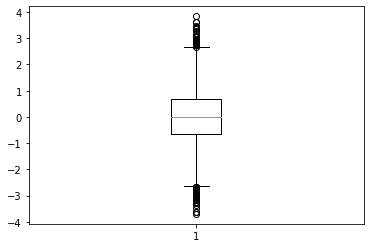

In [5]:
# To see a boxplot we just choose the column of the dataframe we are interested in and pass it
# to pyplot's boxplot function. matplotlib uses numpy arrays for data, but since pandas is built
# on top of numpy things work fluidly
plt.boxplot(df['normal'])

You'll see that matplotlib actually prints out a bunch of information about artists. Often we don't really want to see this, but it can be handy at times. To supress this we simply put a semicolon at the end of our last statement. This is a Jupyter notebook trick that I've actually used a few times and haven't told you about -- it supresses printing the last variable in a cell. Be warned, it's not standard python!

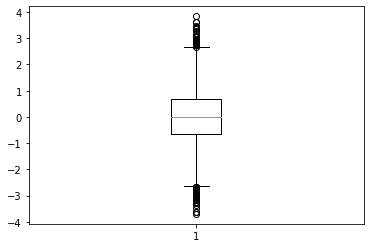

In [6]:
# Now just the image
plt.boxplot(df['normal']);

Great, this gives us a basic box plot. Now let's add the other two samples to it. Unfortunately we can't just pass a whole pandas data frame to matplotlib. Instead we need to pull out each column and send them in as a list of values. 

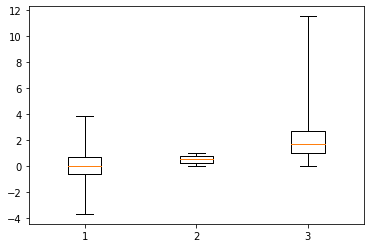

In [21]:
# plot boxplots for all three of df's columns
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100]);

All right, that gives us our three distributions. Now, we didn't normalize the scale, so that's a little wonky. But if we look at the gamma distribution, for instance, we see the tail of it is very, very long. So the maximum values are very far out. Let's take a look at this by itself in a histogram.

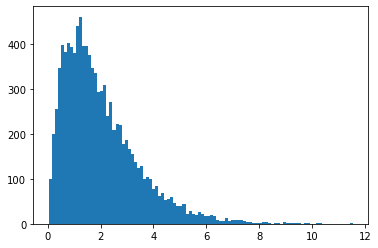

In [11]:
plt.hist(df['gamma'], bins=100);

Interesting, we see it starts at a moderate level, spikes up, then drops off much more gradually and does indeed have a very long tail. Let's add this to our box plot, and I'm going to take this as an opportunity to demonstrate something called **inset axes**.

Recall that we have one figure with one subplot. Since we didn't do anything fancy with subplots, that means we only have one axes object. We can actually overlay an axes on top of another within a figure. We do this by calling the `inset_axes` function on the figure and sending in details of the new axes that we want to create. The details we send are a position in x/y space and the width and height of the new plot.

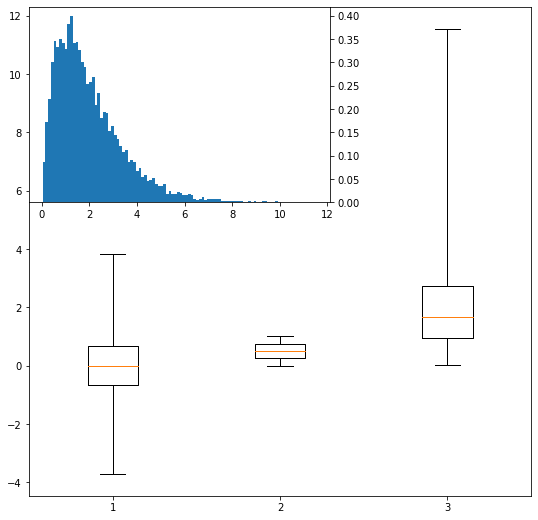

In [14]:
plt.figure(figsize=(9,9))
# Our main figure is our boxplot
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])
# Now let's plot on that axes a new axes object! This will be overlayed on
# top, and we provide a bounding box of (0,0.6) as the bottom left, and 
# (0.6,0.4) as width and height. These are ratios of the ax object
ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4]) #[left, bottom, width, height] 
# Now we can just plot our histogram right on there
ax2.hist(df['gamma'], bins=100, density=True) # a probability density
# And since the histogram will have tick labels on the left and clash with
# the main figure, we can flip them to the right
ax2.yaxis.tick_right();

Pretty cool, isn't it? So in one figure here we have our boxplots of three distributions, and then we have a nice little inset image showing the histogram of the far right boxplot.

Remember again that each boxplot is our five number summary -- a median line in red in the middle, then two boxes on either side of that which represent 25% of the population respectively, then whiskers which run out to the maximum and minimums of the data. This would be a great time to pause the video and play with the notebook, to clean up this figure by adding titles, legends, and the like. How would you make it clear to the reader that the inset histogram is about the boxplot on the far right, for instance?

Now, we often want to look at a boxplot not by seeing the maximum and minimum values but instead by emphasizing outliers. 
How outliers are detected really depends, and there are various mechanisms to determine whether an observation is an outlier or not. If we look at the documentation though, the default for matplotlib is that outliers are all data points which are either greater than or less than the distance between the hinge (the bottom or top of the box, or first and third quartile), and 1.5 * the inter-quartile range (IQR). The interquartile range is the distance between the two hinges, which captures 50% of our data. So if we omit the `whis` parameter to the boxplot call we'll see the outliers using this method plotted.

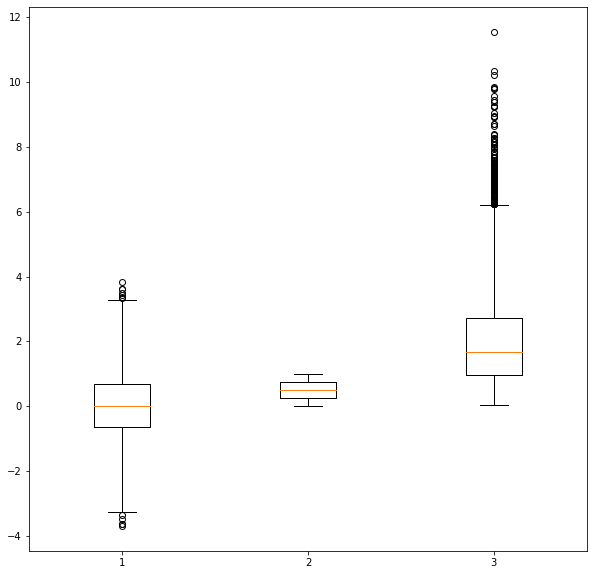

In [23]:
# Nice big figure
plt.figure(figsize=(10,10))
# Now with outliers
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis = 2);

Each circle in the boxplot is a single outlier observation. The box plot is one of the more common plots that you might use as a data scientist, and matplotlib has significant support for different kinds of box plots. Here the matplotlib documentation is key. You can find links in the course resources to the API, which describes the box plot functionality.

I've got one more plot to show you this week - a two dimensional histogram which is better known as a heat map. Then we'll look at a couple more advance features of matplotlib.